In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv("./data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 447.3+ KB


In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [9]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
df = df.drop(['director', 'cast'], axis=1)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df=df[df['date_added'].notna()]

In [12]:
df = df[df['duration'].notna()]

In [13]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [14]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [16]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [17]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [18]:
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [19]:
df['principal_country'] = df['country'].apply(lambda x: x.split(" ")[0])

In [20]:
df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [21]:
df.head(1)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United


In [22]:
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
df['year_added'] = pd.to_numeric(df['year_added'])

In [23]:
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [24]:
def generate_rating_df(df):
  rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
  rating_df = rating_df[rating_df['show_id'] != 0]
  rating_df.columns = ['rating', 'target_ages', 'counts']
  rating_df = rating_df.sort_values('target_ages')
  return rating_df

In [25]:
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

In [26]:
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

show_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Adults,South
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Adults,United
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Adults,United
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Adults,India
5,s6,TV Show,Midnight Mass,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September,Adults,United


In [27]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type" : "pie"}, {"type" : "pie"}]])

fig.add_trace(
  go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
  row=1, col=1
)

fig.add_trace(
  go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
  row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
  title_text="Rating distribution by Type of content",
  annotations=[dict(text='Movies', x=0.2, y=0.5, font_size=12, showarrow=False),
               dict(text='TV Shows', x=0.81, y=0.5, font_size=12, showarrow=False)]
)

fig.show()

In [28]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] / country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [29]:
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [32]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id' : 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id' : 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
  x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'],
  y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
  mode='lines+markers',
  name='Movie: Released Year',
  marker_color='green'
))
fig.add_trace(go.Scatter(
  x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'],
  y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
  mode='lines+markers',
  name='TV Show: Released Year',
  marker_color='darkgreen'
))
fig.add_trace(go.Scatter(
  x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'],
  y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
  mode='lines+markers',
  name='Movie: added Year',
  marker_color='orange'
))
fig.add_trace(go.Scatter(
  x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'],
  y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
  mode='lines+markers',
  name='TV Show: added Year',
  marker_color='darkorange'
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

<AxesSubplot:xlabel='release_year'>

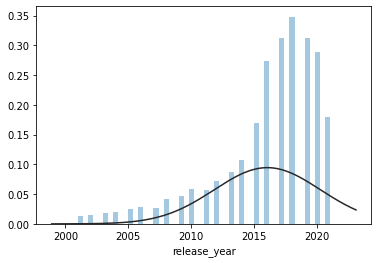

In [35]:
from scipy.stats import norm # 정규분포

sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

In [36]:
movie_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,"Germany,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,March,Adults,United
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November,Adults,United
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November,Adults,United
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,United


In [37]:
movie_df['genre'] = movie_df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
show_df['genre'] = show_df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
display(movie_df['genre'])
display(show_df['genre'])

0                                         [Documentaries]
6                              [Children & Family Movies]
7       [Dramas, Independent Movies, International Mov...
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genre, Length: 6128, dtype: object

1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
5                    [TV Dramas, TV Horror, TV Mysteries]
                              ...                        
8795                             [Anime Series, Kids' TV]
8796                  [International TV Shows, TV Dramas]
8797                                           [Kids' TV]
8800    [International TV Shows, Romantic TV Shows, TV...
8803             [Kids' TV, Korean TV Shows, TV Comedies]
Name: genre, Length: 2666, dtype: object

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
def calculate_mlb(series):
  mlb = MultiLabelBinarizer()
  mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
  return mlb_df

In [51]:
def top_genres(df, title='Top ones'):
  genres_df = calculate_mlb(df['genre'])
  tdata = genres_df.sum().sort_values(ascending=False)
  fig = go.Figure()
  fig.add_trace(go.Bar(
    x=tdata.index,
    y=tdata.values,
  ))
  fig.update_xaxes(categoryorder='total descending')
  fig.update_layout(title=title)
  fig.show()

In [52]:
top_genres(movie_df, title='Top Movies Genres')

In [53]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [54]:
top_genres(show_df, title='Top TV Shows Genres')

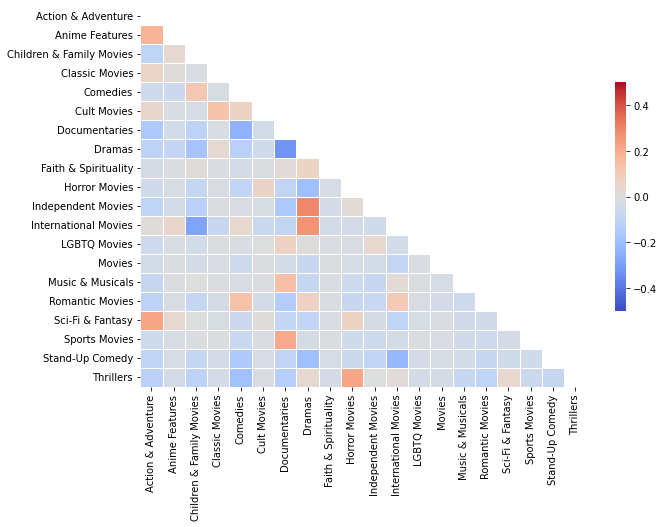

In [62]:
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(movie_corr, mask=movie_mask, cmap='coolwarm', vmax=.5, vmin=-.5, center=0, linewidths=.5, cbar_kws={'shrink': 0.6})

plt.show()

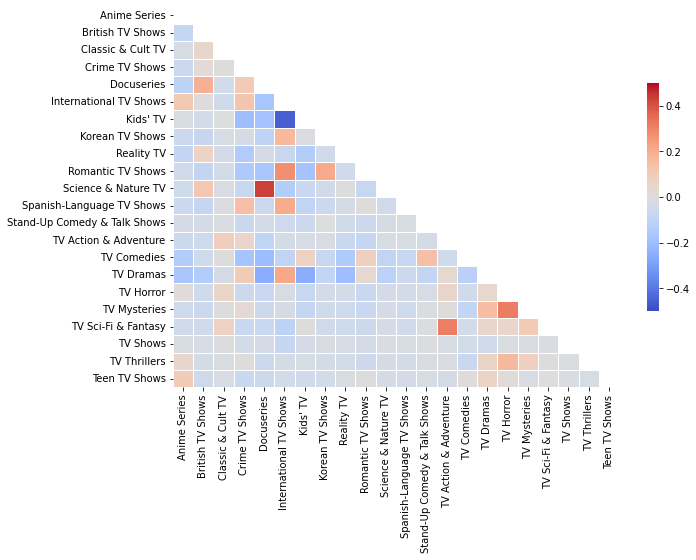

In [67]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()